In [1]:
import numpy as np 
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.constants import pi
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
#Constants
g_cm3_to_mev4 = 4.247e-6
dynes_cm2_to_mev4 = 4.56e-27
neutron_drip_density = 4e11 #cgs
G = 6.6743e-11 #m3/kgs2
G_MeV = 6.8034e-45

In [3]:
#BPS EoS (before Pcrit)
bps_datapack = np.genfromtxt('../BPS.dat', dtype=float, skip_header=1)
bps_enden_arr = bps_datapack.T[0]*g_cm3_to_mev4
bps_p_arr = bps_datapack.T[1]*dynes_cm2_to_mev4
min_pressure = min(bps_p_arr)
max_pressure = 1e11
bps_eos = interp1d(bps_p_arr, bps_enden_arr, 'cubic', fill_value='extrapolate')
bps_p_f = interp1d(bps_enden_arr,bps_p_arr,'cubic',fill_value='extrapolate')

Pcrit = bps_p_f(neutron_drip_density*g_cm3_to_mev4)

#EoS: kP+4B (after Pcrit)
k = 3 #dimensionless
B = 145**4 #MeV4
dp = 100
def kPand4B(P):
    return (k*P + 4*B)

#Final EoS
def eos(p):
    e = 1/2*(1-np.tanh((p - Pcrit)/dp))*bps_eos(p) + 1/2*(1+np.tanh((p - Pcrit)/dp))*kPand4B(p)
    return e

In [4]:
def tov_eq(r,y):
    P, m = y
    eden = eos(P)
    dpdr = -G_MeV*(P + eden)*(m + 4*pi*r**3*P)/(r*(r-2*G_MeV*m))
    dmdr = 4*pi*r**2*eden
    return [dpdr,dmdr]

In [5]:
N=10 # Number of stars.
dr = 0.1
rtol=1.0e-6
radii = np.arange(dr, 10e5 +dr,dr)
radii_MeV = radii*1e15/0.197

In [6]:
m=[]
p=[] 
r=[]
for c_dens in np.logspace(-8,12,N): #Diffenent values of central density.
    ind=-1
    sol = odeint(tov_eq, y0=[c_dens,0.01],t=radii_MeV, tfirst=True, rtol=rtol)
    p_r, m_r = sol.T
    for i,em in enumerate(p_r):
        if em <=0:
            ind = i-1
            break
    m.append(m_r[ind]) #keeping only the Mass
    p.append(p_r[ind]) #for validation
    r.append(radii_MeV[ind]) #keeping only the Radius

In [7]:
mass = np.array(m)
radius = np.array(r)
r_km = radius/(1e15/0.197)

In [8]:
MeV_to_kg = 1.8e-30
Msun = 1.989e30 #kg
Msun_MeV = Msun/MeV_to_kg
mass = mass/Msun_MeV

Because of the different needed accuracy, the problem was solved for different regions with different N number in each case. The results were saved into .npy files. Along with those, the extremum points of the graph were saved as well. The files are loaded and plotted below.

In [9]:
MR0 = np.load('MR0.npy')
MR1 = np.load('MR1.npy')
MR2 = np.load('MR2.npy')
MR3 = np.load('MR3.npy')
MR4 = np.load('MR4.npy')
MR5 = np.load('MR5.npy')
MR6 = np.load('MR6.npy')
MR7 = np.load('MR7.npy')

MRa = np.load('MRa.npy')
MRb = np.load('MRb.npy')
MRc = np.load('MRc.npy')
MRd = np.load('MRd.npy')
MRe = np.load('MRe.npy')

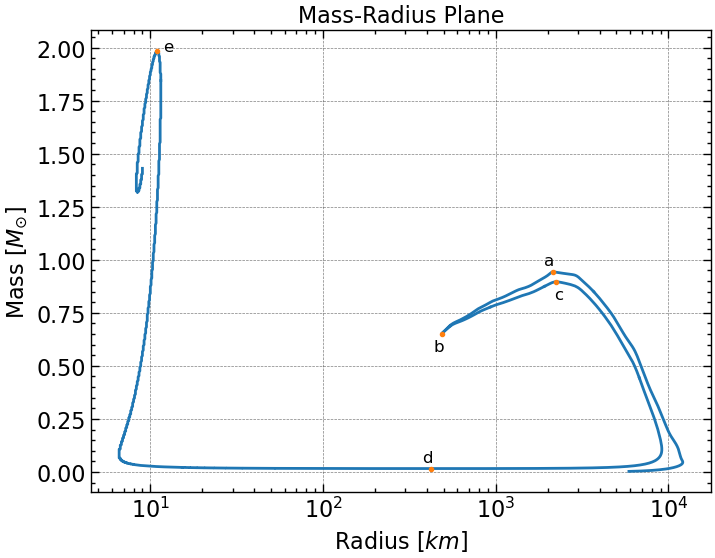

In [10]:
plt.plot(MR0.T[0],MR0.T[1], color='tab:blue') #(-8,-1)
plt.plot(MR1.T[0],MR1.T[1], color='tab:blue') #(-1,6)
plt.plot(MR2.T[0],MR2.T[1], color='tab:blue') #(6,6.6)
plt.plot(MR3.T[0],MR3.T[1], color='tab:blue') #(6.6,6.8)
plt.plot(MR4.T[0],MR4.T[1], color='tab:blue') #(6.8,6.9)
plt.plot(MR5.T[0],MR5.T[1], color='tab:blue') #(6.9,7)
plt.plot(MR6.T[0],MR6.T[1], color='tab:blue') #(7,9)
plt.plot(MR7.T[0],MR7.T[1], color='tab:blue') #(9,12)
plt.scatter(MRa.T[0],MRa.T[1], color='tab:orange', marker='.', s=35, zorder=3)
plt.text(MRa.T[0]-250, MRa.T[1] + 0.03, 'a', fontsize='12')
plt.scatter(MRb.T[0],MRb.T[1], color='tab:orange', marker='.', s=35, zorder=3)
plt.text(MRb.T[0]-50, MRb.T[1] - 0.08, 'b', fontsize='12')
plt.scatter(MRc.T[0],MRc.T[1], color='tab:orange', marker='.', s=35, zorder=3)
plt.text(MRc.T[0]-50, MRc.T[1] - 0.08, 'c', fontsize='12')
plt.scatter(MRd.T[0],MRd.T[1], color='tab:orange', marker='.', s=35, zorder=3)
plt.text(MRd.T[0]-50, MRd.T[1] + 0.03, 'd', fontsize='12')
plt.scatter(MRe.T[0],MRe.T[1], color='tab:orange', marker='.', s=35, zorder=3)
plt.text(MRe.T[0]+0.8, MRe.T[1], 'e', fontsize='12')
plt.xscale('log')
plt.xlabel('Radius [$km$]')
plt.ylabel('Mass [$M_{\odot}$]')
plt.title('Mass-Radius Plane')
plt.show()